In [ ]:
#TEXT CLUSTERING USING TF-IDF VECTORIZER 

In [1]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
from tabulate import tabulate

# Load the dataset
df = pd.read_csv("customer_complaints_1.csv")


def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.strip()
    return text

df['cleaned_text'] = df['text'].astype(str).apply(preprocess_text)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_text'])
k = 3
km = KMeans(n_clusters=k)
km.fit(X)
y_pred = km.predict(X)

table_data = [["Document", "Predicted Cluster"]] 
table_data.extend([[doc[:60] + "...", cluster] for doc, cluster in zip(df['text'], y_pred)])
print(tabulate(table_data, headers="firstrow"))
print("\nTop terms per cluster:") 
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
terms = vectorizer.get_feature_names_out() 
for i in range(k): 
    print("Cluster %d:" % i) 
    for ind in order_centroids[i, :10]: 
        print(' %s' % terms[ind]) 
        print()
total_samples = len(y_pred) 
cluster_label_counts = [Counter(y_pred)] 
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples 
print("Purity:", purity)


Document                                                           Predicted Cluster
---------------------------------------------------------------  -------------------
I used to love Comcast. Until all these constant updates. My...                    1
I'm so over Comcast! The worst internet provider. I'm taking...                    1
If I could give them a negative star or no stars on this rev...                    2
I've had the worst experiences so far since install on 10/4/...                    0
Check your contract when you sign up for Comcast as their ad...                    2
Thank God. I am changing to Dish. They gave me awesome prici...                    0
I Have been a long time customer and only have Xfinity as my...                    2
There is a malfunction on the DVR manager which is preventin...                    1
Charges overwhelming. Comcast service rep was so ignorant an...                    2
I have had cable, DISH, and U-verse, etc. in the past. All a...  

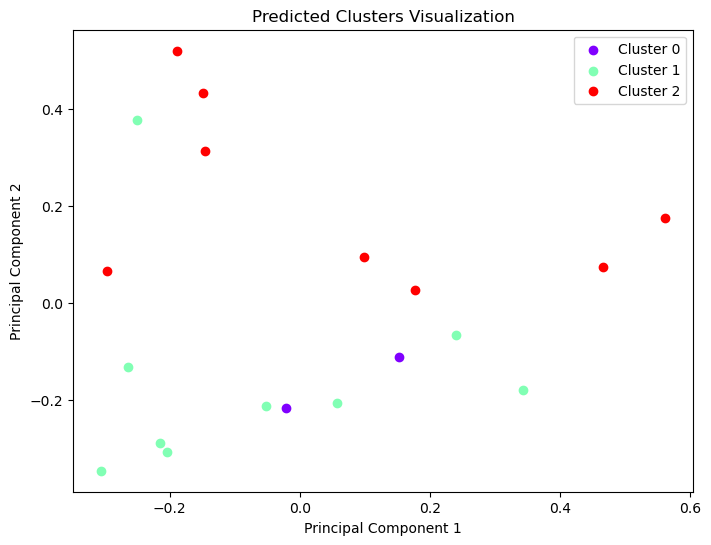

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.cm as cm

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

colors = cm.rainbow(np.linspace(0, 1, k))


plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], color=colors[i], label=f'Cluster {i}')
plt.title('Predicted Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
#Word2Vec

In [17]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
from tabulate import tabulate

# Tokenize preprocessed text
tokenized_dataset = [doc.split() for doc in df['cleaned_text']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_dataset, vector_size=100, window=5, min_count=1, workers=4)

# Create document embeddings (mean of word vectors per document)
X_word2vec = np.array([
    np.mean([word2vec_model.wv[word] for word in doc if word in word2vec_model.wv], axis=0)
    if len([word for word in doc if word in word2vec_model.wv]) > 0 else np.zeros(100)
    for doc in tokenized_dataset
])


k = 3
km = KMeans(n_clusters=k)
km.fit(X)
y_pred = km.predict(X)
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc[:60] + "...", cluster] for doc, cluster in zip(df['text'], y_pred)])
print(tabulate(table_data, headers="firstrow")) 

total_samples = len(y_pred) 
cluster_label_counts = [Counter(y_pred)] 
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples 
print("Purity:", purity)

Document                                                           Predicted Cluster
---------------------------------------------------------------  -------------------
I used to love Comcast. Until all these constant updates. My...                    0
I'm so over Comcast! The worst internet provider. I'm taking...                    0
If I could give them a negative star or no stars on this rev...                    1
I've had the worst experiences so far since install on 10/4/...                    0
Check your contract when you sign up for Comcast as their ad...                    0
Thank God. I am changing to Dish. They gave me awesome prici...                    1
I Have been a long time customer and only have Xfinity as my...                    0
There is a malfunction on the DVR manager which is preventin...                    0
Charges overwhelming. Comcast service rep was so ignorant an...                    2
I have had cable, DISH, and U-verse, etc. in the past. All a...  

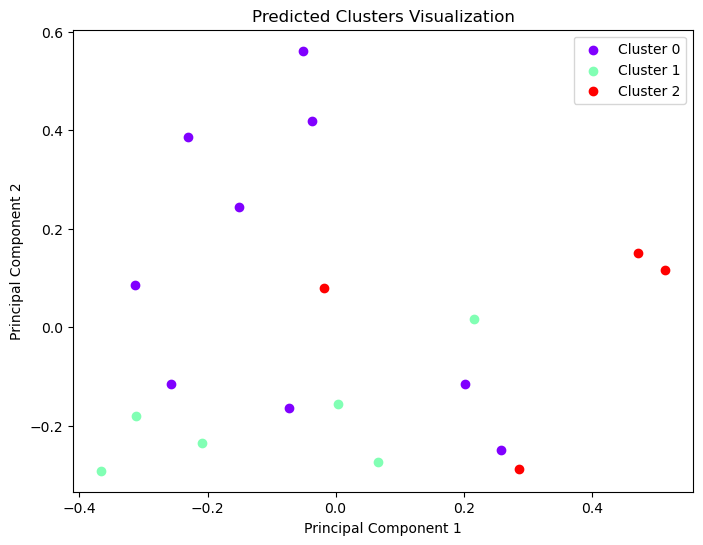

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.cm as cm

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

colors = cm.rainbow(np.linspace(0, 1, k))


plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], color=colors[i], label=f'Cluster {i}')
plt.title('Predicted Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
#Tried the random seed.

In [99]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter
from tabulate import tabulate

# Load the dataset
df = pd.read_csv("customer_complaints_1.csv")


def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.strip()
    return text

df['cleaned_text'] = df['text'].astype(str).apply(preprocess_text)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_text'])
k = 3
km = KMeans(n_clusters=k, random_state=9)
km.fit(X)
y_pred = km.predict(X)

table_data = [["Document", "Predicted Cluster"]] 
table_data.extend([[doc[:60] + "...", cluster] for doc, cluster in zip(df['text'], y_pred)])
print(tabulate(table_data, headers="firstrow"))
print("\nTop terms per cluster:") 
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
terms = vectorizer.get_feature_names_out() 
for i in range(k): 
    print("Cluster %d:" % i) 
    for ind in order_centroids[i, :10]: 
        print(' %s' % terms[ind]) 
        print()
total_samples = len(y_pred) 
cluster_label_counts = [Counter(y_pred)] 
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples 
print("Purity:", purity)


Document                                                           Predicted Cluster
---------------------------------------------------------------  -------------------
I used to love Comcast. Until all these constant updates. My...                    0
I'm so over Comcast! The worst internet provider. I'm taking...                    0
If I could give them a negative star or no stars on this rev...                    1
I've had the worst experiences so far since install on 10/4/...                    2
Check your contract when you sign up for Comcast as their ad...                    2
Thank God. I am changing to Dish. They gave me awesome prici...                    1
I Have been a long time customer and only have Xfinity as my...                    2
There is a malfunction on the DVR manager which is preventin...                    2
Charges overwhelming. Comcast service rep was so ignorant an...                    2
I have had cable, DISH, and U-verse, etc. in the past. All a...  